In [1]:
import glob, sys
from IPython.display import HTML

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from astropy.io import fits
from pyflowmaps.flow import flowLCT

import warnings
warnings.filterwarnings("ignore")

# Load the data
We include in the folder *data/* a cube fits file with the data coaligned and centered in a active region NOAA 1757.

In [2]:
cube = fits.getdata('data/cube_sunspot.fits')
print(cube.shape)

(30, 128, 128)


Look into one of the frames in the cube.

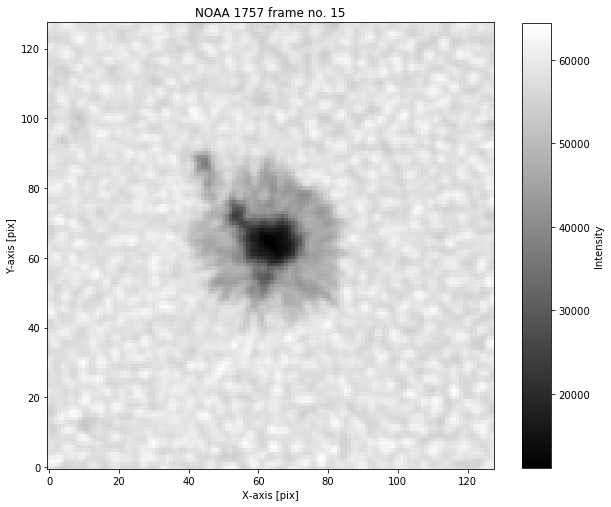

In [3]:
fig, ax = plt.subplots(figsize=(10,10))
im=ax.imshow(cube[15],origin='lower',cmap='gray')
ax.set_title('NOAA 1757 frame no. 15')
ax.set_xlabel('X-axis [pix]')
ax.set_ylabel('Y-axis [pix]')
fig.colorbar(im,ax=ax,label='Intensity',shrink=0.82,aspect=15)

The shape of the data corresponds to 30 images with 128x128 pix dimesions per image. The frames are cut off from HMI/SDO data from 2013-01-05, intensity product, wtih a cadence of $720 s$, and the pixel size is around $\sim 0.504$. Other parameter we need is the size of the apodization window $FWHM$ which for this example will be $3\, arcsec$. This size depends on the size of the feature you want to study, as well as the resolution of your instrument. Other parameter that is neccesary is the average time over which the velocities will be calculated, but actually, it is included on the size of the input cube. For this example, the time over the average will be calculate is 6 hours ($30\times720 s=21600 s=6 h$).

In [4]:
flows = flowLCT(cube, 3, 0.504, 720,method='square',interpolation='fivepoint',window='boxcar')

We extract the velocities

In [5]:
vx = flows.vx
vy = flows.vy
vz = flows.vz

-8.673617379884035e-19 0.2813307552490982
0.0 0.21734476653809726
0.8955099947945748 22.00409316318381


Velocities are returned in $kms^{-1}$. The velocity $v_z$ comes from
$$
v_z = h_m\nabla\cdot v_h(v_x,v_y) 
$$
where $v_h$ are the horizontal velocities which depends on $v_x$ and $v_y$, whereas $h_m=150\,km$ is the mass-flux scale-heigth [(November 1989, ApJ,344,494)](https://ui.adsabs.harvard.edu/abs/1989ApJ...344..494N/abstract). Some authors prefer to show the divergences instead of the $v_z$, so the user just need to divide $v_z/h_m$.

Next, the users can also create colormaps and personlize them.

In [ ]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

top = cm.get_cmap('Reds_r', 128)
bottom = cm.get_cmap('YlGn', 128)

newcolors = np.vstack((top(np.linspace(0.3, 1, 128)),
                       bottom(np.linspace(0, 0.75, 128))))
newcmp = ListedColormap(newcolors, name='RdYlGn')

Now, we will plot the flows in each horizontal direction, and the divergence.

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,8),sharey=True)
plt.subplots_adjust(wspace=0.03)
flowx=ax[0].imshow(vx,origin='lower',cmap='RdYlGn',vmin = vx.mean()-3*vx.std(),vmax=vx.mean()+3*vx.std())
ax[0].set_title('Horizontal flowmap vx')
ax[0].set_xlabel('X-axis [pix]')
ax[0].set_ylabel('Y-axis [pix]')

flowy=ax[1].imshow(vy,origin='lower',cmap='RdYlGn',vmin = vy.mean()-3*vy.std(),vmax=vy.mean()+3*vy.std())
ax[1].set_title('Horizontal flowmap vy')
ax[1].set_xlabel('X-axis [pix]')

div = vz/150
flowz=ax[2].imshow(div,origin='lower',cmap='RdYlGn',vmin = div.mean()-3*div.std(),vmax=div.mean()+3*div.std())
ax[2].set_title('Horizontal flowmap divergence')
ax[2].set_xlabel('X-axis [pix]')

fig.colorbar(flowx,ax=ax[0],orientation='horizontal',shrink=1,label='vx [km/s]')
fig.colorbar(flowy,ax=ax[1],orientation='horizontal',shrink=1,label='vy [km/s]')
fig.colorbar(flowz,ax=ax[2],orientation='horizontal',shrink=1,label='divergence')
fig.savefig('/Users/joseivan/pyflowmaps/images/flowmaps.jpg',format='jpeg',bbox_inches='tight')

Finally, we can also plot the arrows associated with the horizontal velocities

In [ ]:
xx,yy = np.meshgrid(np.arange(128),np.arange(128)) # we create a grid
dense = 2 # each how many pixels you want to plot arrows
fig,ax = plt.subplots(figsize=(10,10))
Q = ax.quiver(xx[::dense,::dense],yy[::dense,::dense],vx[::dense,::dense],vy[::dense,::dense], 
              color='k', scale=8, headwidth= 4, headlength=4, width=0.0012)
im = ax.imshow(cube[15],cmap='gray',origin='lower')
ax.set_title('Flowmap horizontal velocities overplotted')
ax.set_xlabel('X-axis [pix]')
ax.set_ylabel('Y-axis [pix]')
fig.colorbar(im,ax=ax,label='Intensity',shrink=0.82,aspect=15)
fig.savefig('/Users/joseivan/pyflowmaps/images/flowmaps_arrows.jpg',format='jpeg',bbox_inches='tight')